## Libraries

In [86]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
from matplotlib import rc

## Constants

In [70]:
DIR = "/mnt/perkinsdata/tongue_STOmics/benchmarking/25_2k_4"
FILE = "accuracy.csv"

MEASURES = [("tf", "Recall"), ("tf", "Precision"), ("ft", "Entropy_wo")]
ALGOS = ["Watershed", "Cellpose", "DeepCell"]

In [4]:
# make output dir
OUTPUT = os.path.join(DIR, "plots")
!mkdir $OUTPUT

In [116]:
rc('font', **{'family': 'serif', 'serif': ['Computer Modern'], "size": 14})
rc('text', usetex=True)


## Load Data

In [5]:
data = pd.read_csv(os.path.join(DIR, FILE))

In [71]:
# get plotting data from data
means = []
stds = []
for m in MEASURES:
    means.append(list(data[data["TF_FT"] == m[0]][m[1] + "_m"]))
    stds.append(list(data[data["TF_FT"] == m[0]][m[1] + "_s"]))

## Plotting

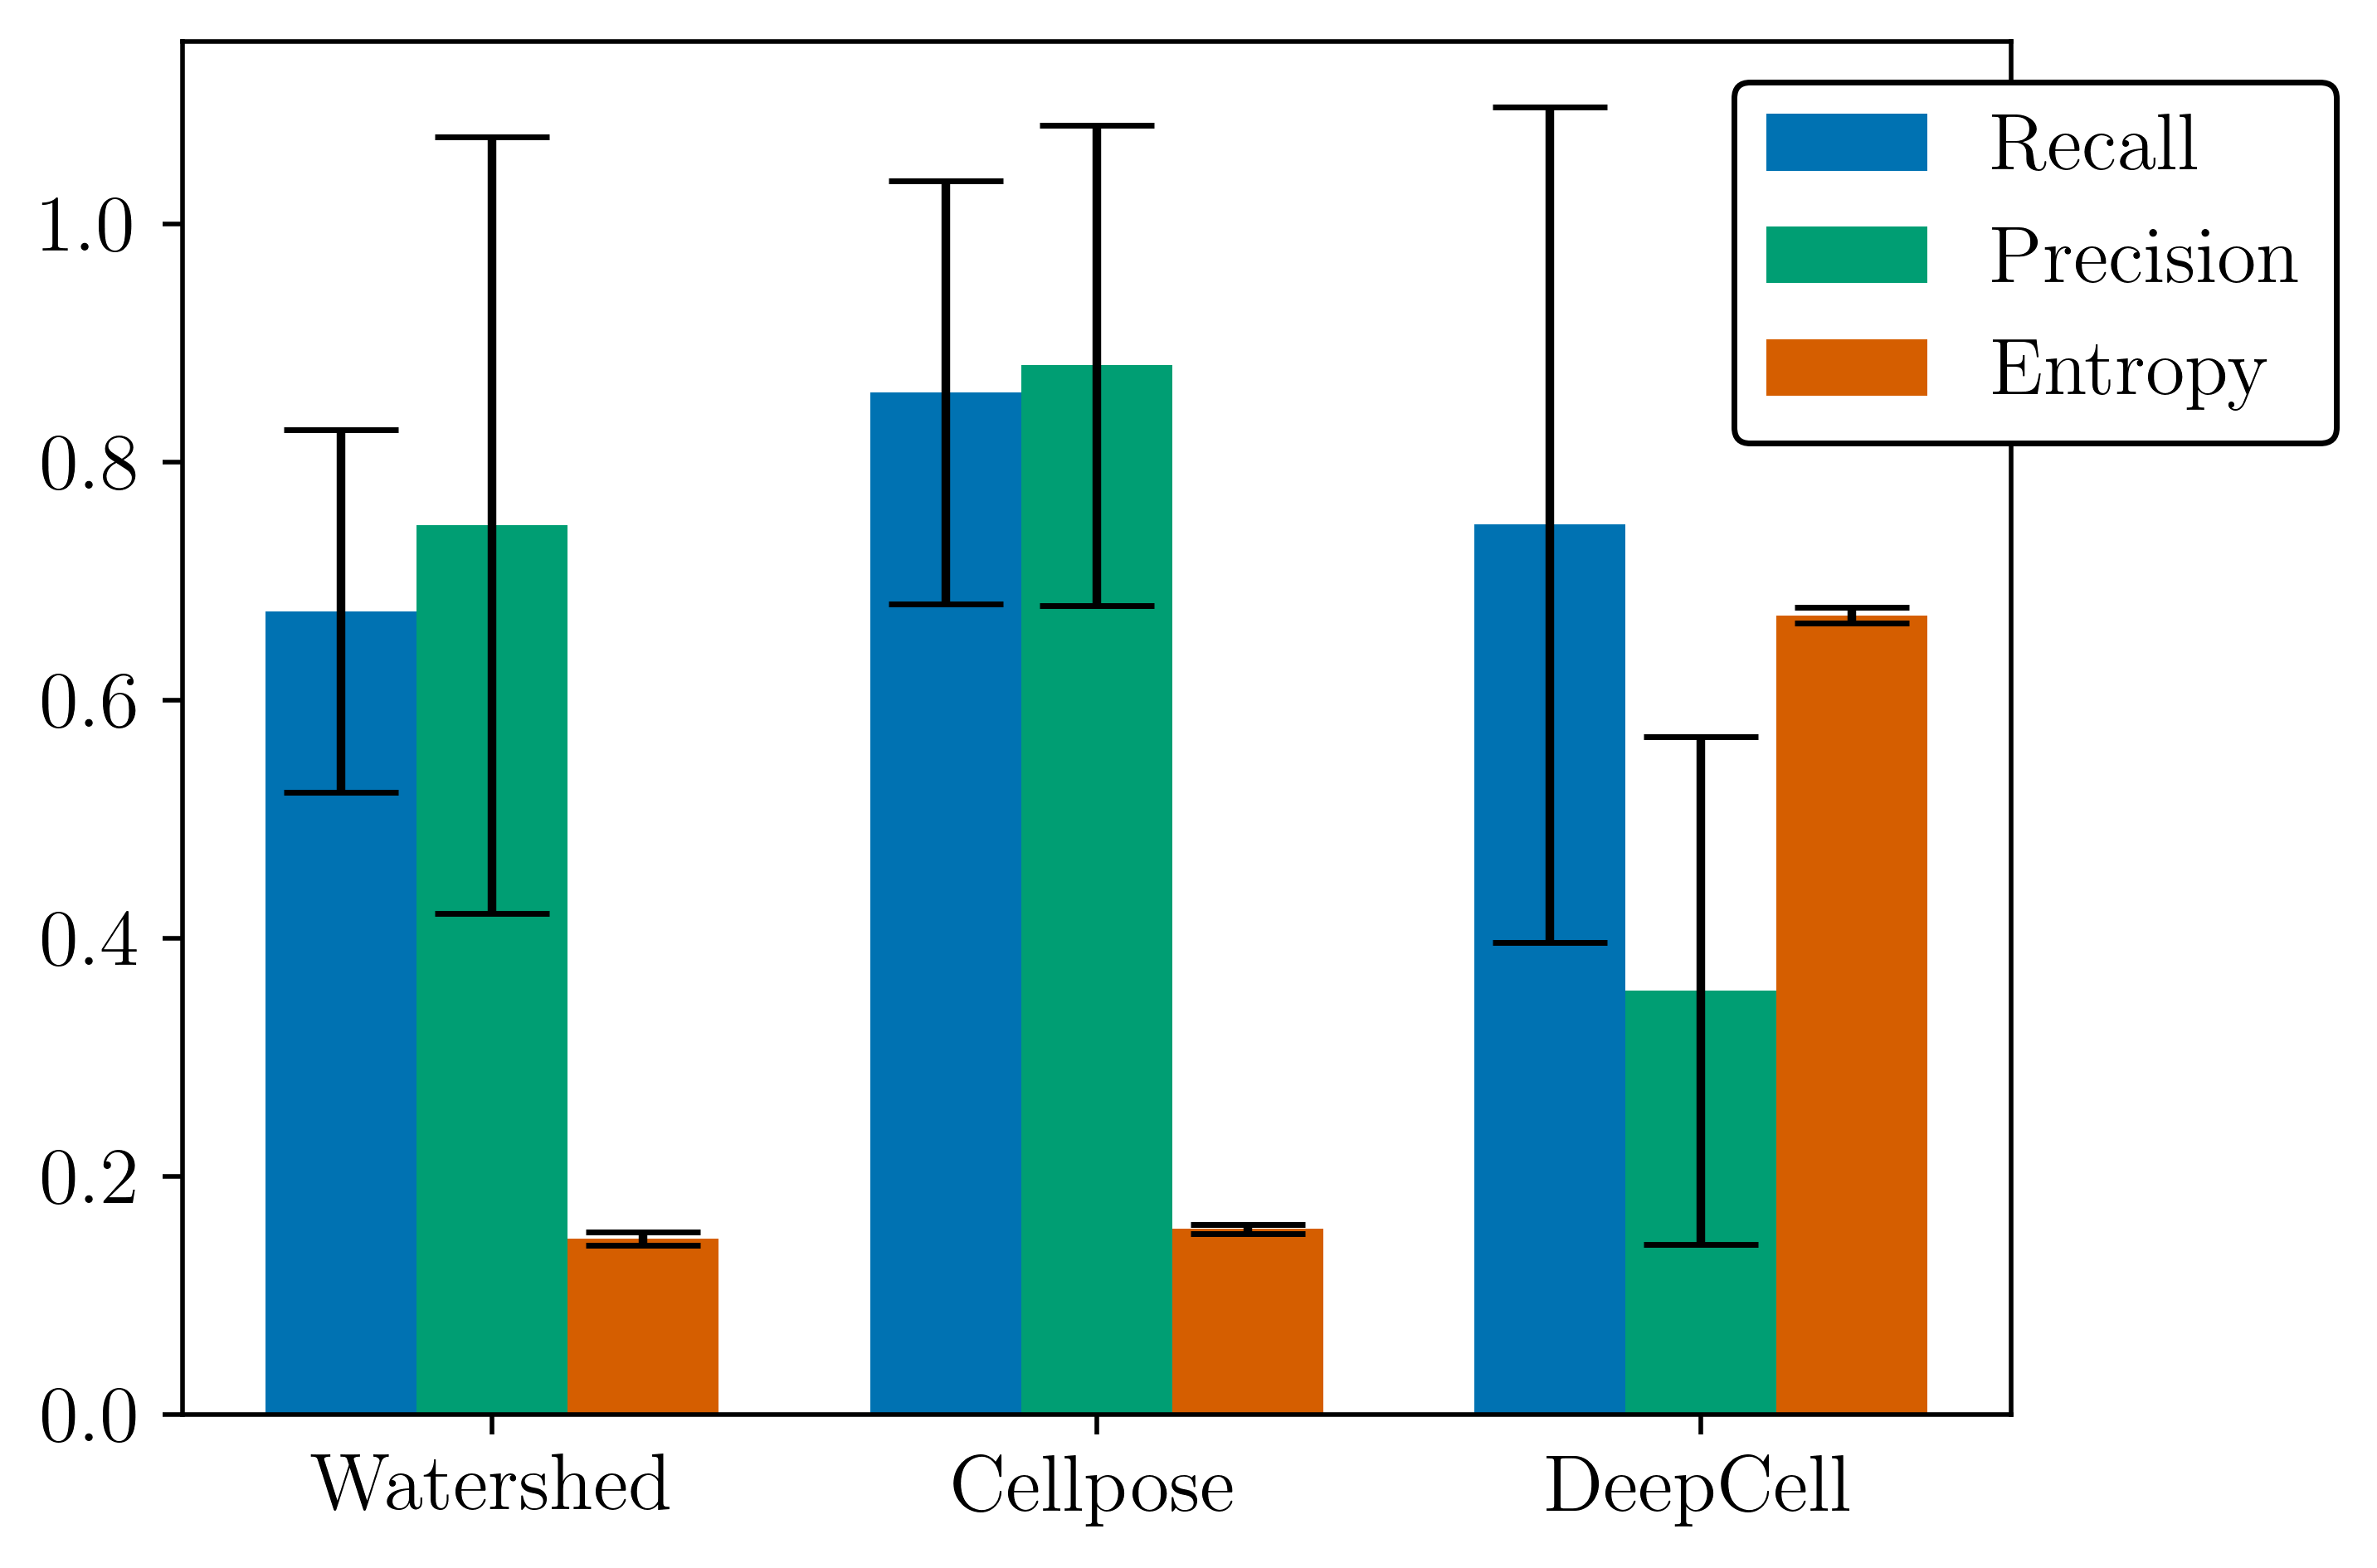

In [119]:
fig, ax = plt.subplots()

# set colour style
plt.style.use('seaborn-colorblind')

# set white background
fig.patch.set_facecolor('white')
#plt.rcParams["font.weight"] = "bold"
# set im size
fig.set_size_inches(6, 4)
fig.set_dpi(500)

# add bar plots
ax.bar(X + 0.00, means[0], yerr=stds[0], align='center', capsize=10, width = 0.25)
ax.bar(X + 0.25, means[1], yerr=stds[1], align='center', capsize=10, width = 0.25)
ax.bar(X + 0.50, means[2], yerr=stds[2], align='center', capsize=10, width = 0.25)

#ax.set_ylabel('Accuracy Measure')
ax.set_xticks(X+0.25)
ax.set_xticklabels(ALGOS)
#ax.set_title('Recall, Precision, and Entropy on Synthetic Images')
ax.yaxis.grid(False)

ax.legend(labels=['Recall', 'Precision', "Entropy"], bbox_to_anchor=(1.2, 1), fancybox=True, framealpha=1, edgecolor = "black")

# Save the figure and show
plt.tight_layout()
plt.savefig(os.path.join(OUTPUT, "x_method.pdf"), dpi = 500, format = "pdf", pad_inches = 0, bbox_inches = "tight")
plt.show()

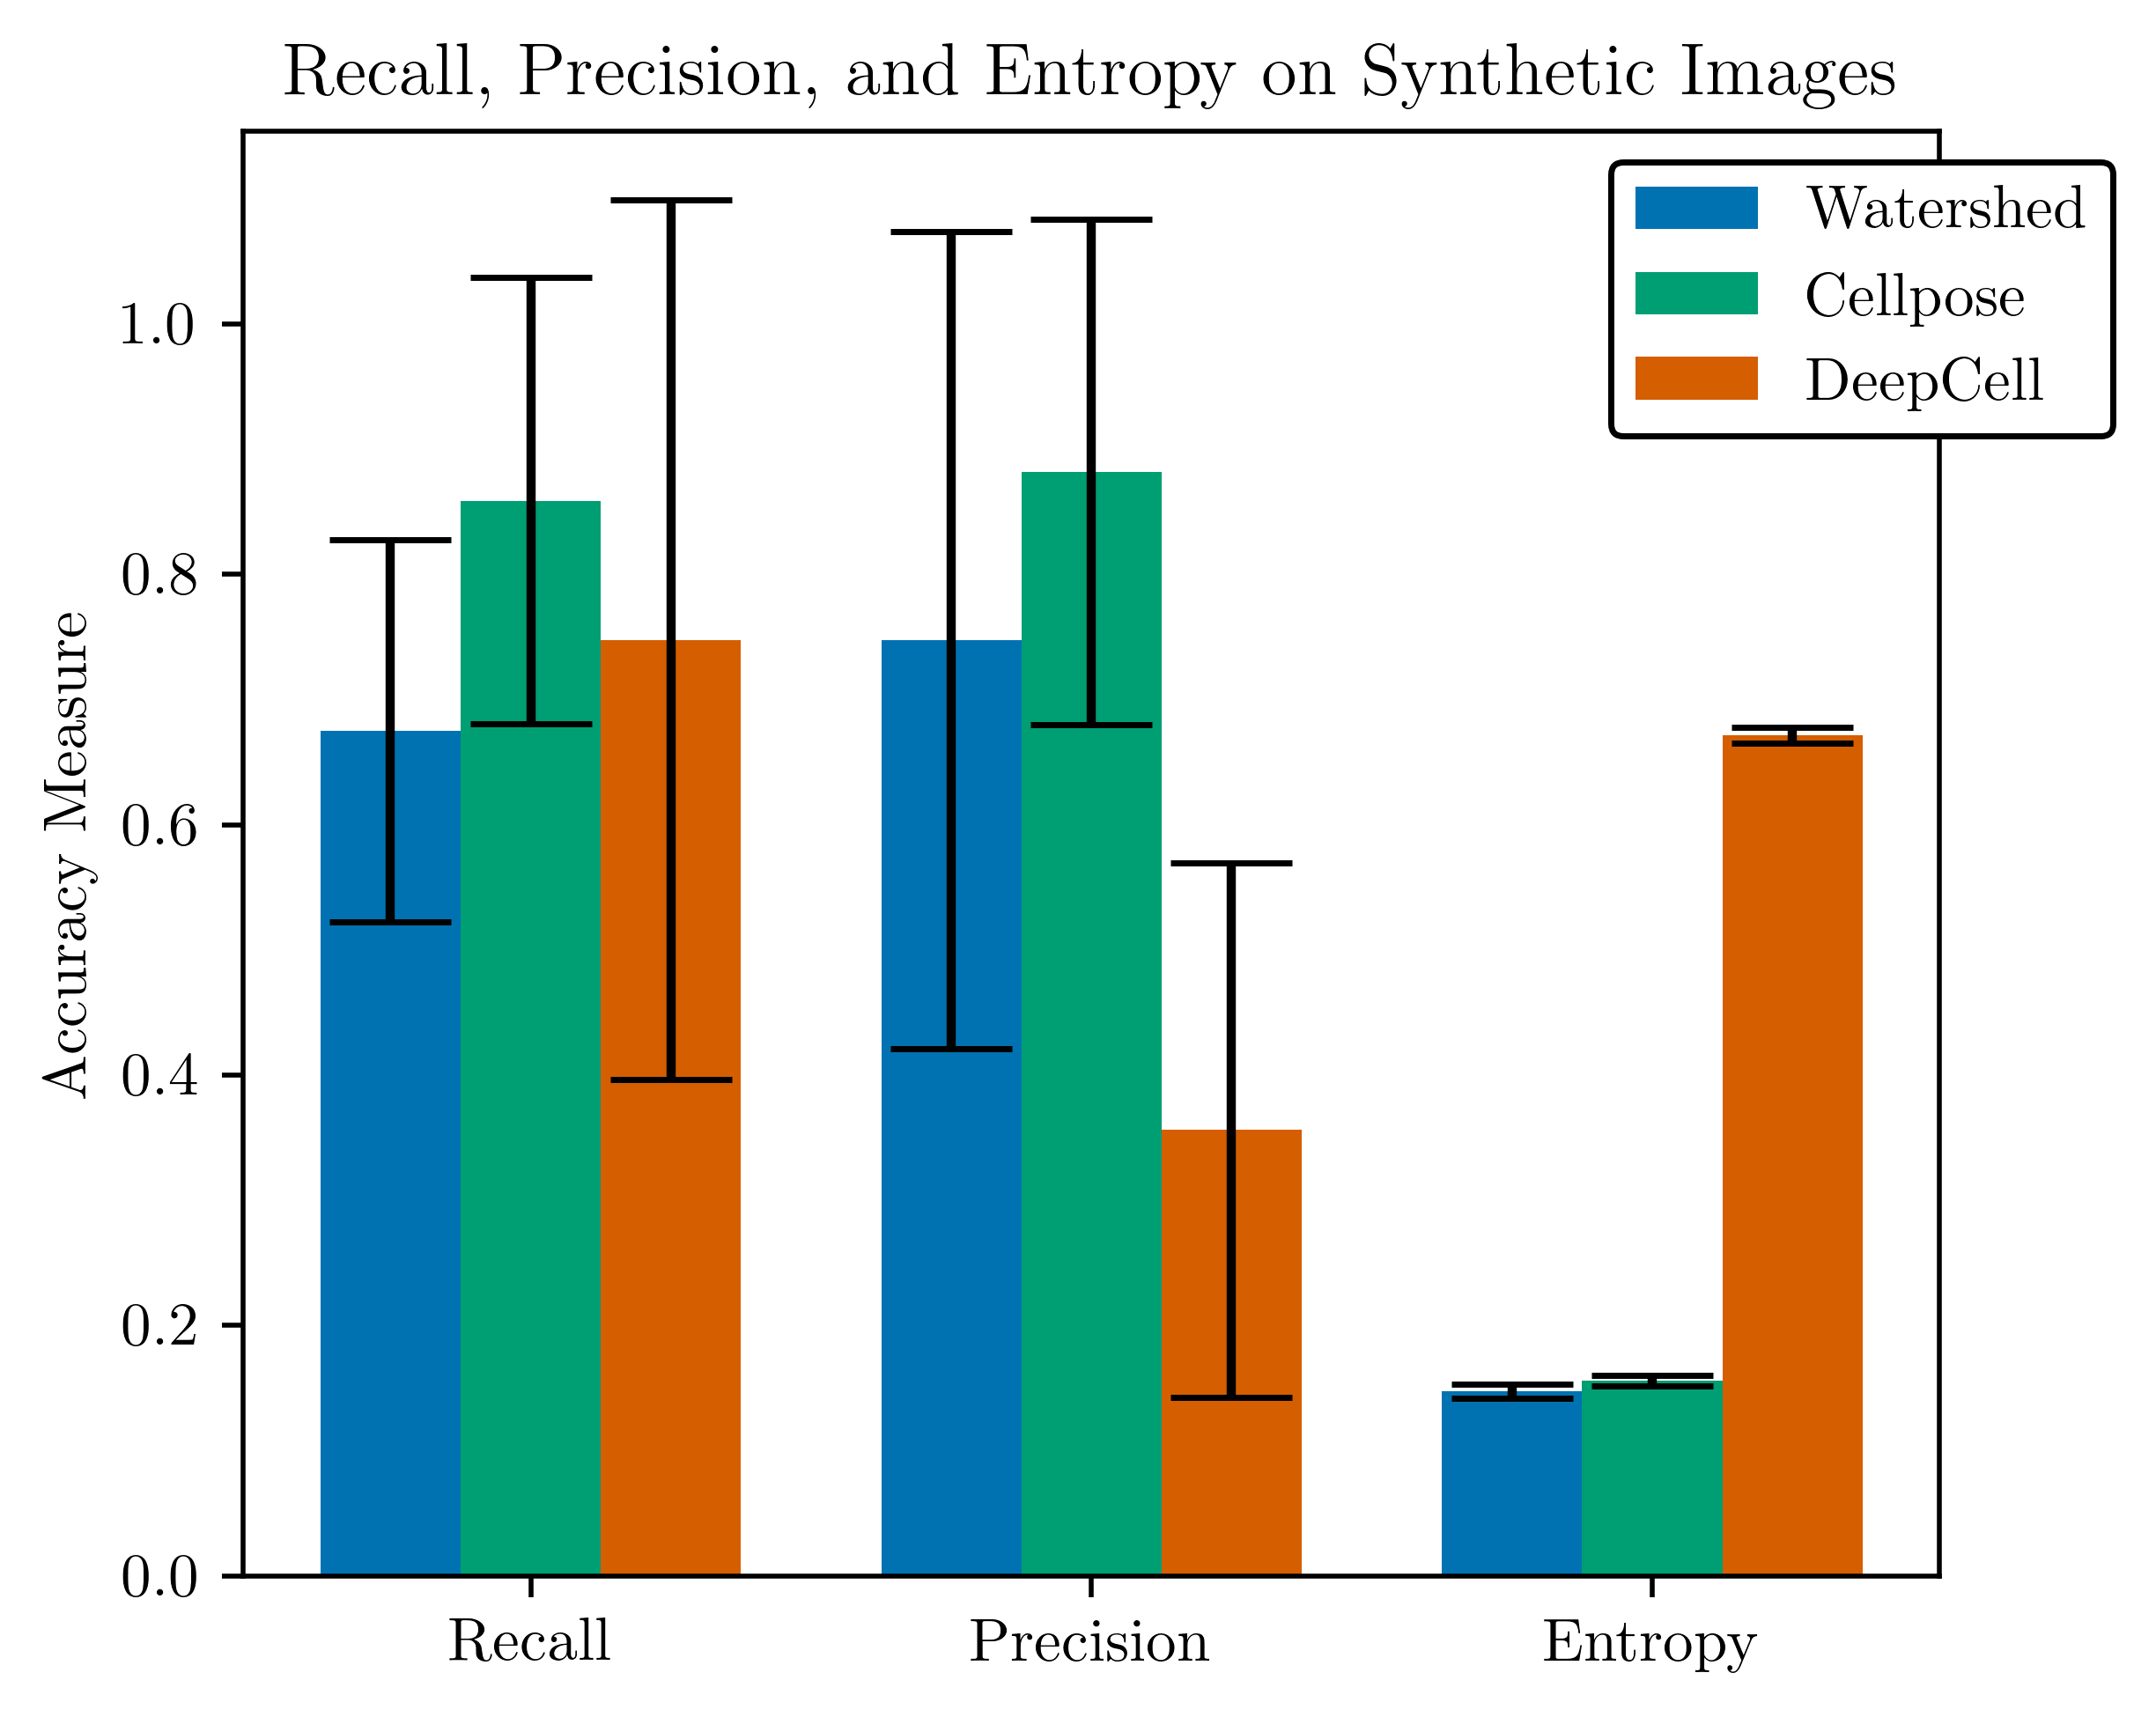

In [87]:


fig, ax = plt.subplots()

# set colour style
plt.style.use('seaborn-colorblind')

# set white background
fig.patch.set_facecolor('white')

# tranpose means and stds
means_t = np.array(means).T
stds_t = np.array(stds).T

# set im size
fig.set_size_inches(5, 4)
fig.set_dpi(500)

# add bar plots
ax.bar(X + 0.00, means_t[0], yerr=stds_t[0], align='center', capsize=10, width = 0.25)
ax.bar(X + 0.25, means_t[1], yerr=stds_t[1], align='center', capsize=10, width = 0.25)
ax.bar(X + 0.50, means_t[2], yerr=stds_t[2], align='center', capsize=10, width = 0.25)

ax.set_ylabel('Accuracy Measure')
ax.set_xticks(X+0.25)
ax.set_xticklabels(['Recall', 'Precision', "Entropy"])
ax.set_title('Recall, Precision, and Entropy on Synthetic Images')
ax.yaxis.grid(False)

ax.legend(labels=ALGOS, bbox_to_anchor=(1.12, 1), fancybox=True, framealpha=1, edgecolor = "black")

# Save the figure and show
plt.tight_layout()
plt.savefig(os.path.join(OUTPUT, "x_accuracy.pdf"), dpi = 500, format = "pdf", pad_inches = 0, bbox_inches = "tight")
plt.show()